In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

n_iterations = 25
data = ["logistic","gauss","sine"]
from KC_methods import methods, datasets, calc_KC76
SAMPLES = 10**6

from different_maps import generate_map_raw,logistic_map

C:\Users\m7mdk\AppData\Local\Temp\ipykernel_13568\4041165679.py:30: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([min(probability_values)/1.7,0])


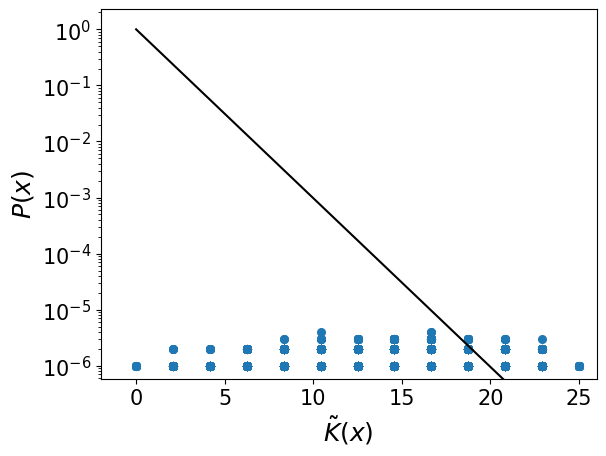

In [3]:
for start in (0,3,3.57,4):
    patterns = generate_map_raw(25,logistic_map.func,(start,4),(0,1),0.5)

    probability = Counter(patterns)
    probability = {k: v/SAMPLES for k,v in probability.items()}
    probability_values =  list(probability.values())
    # method = calc_KC76
    complexities = list(map(calc_KC76,probability.keys()))
    K = np.array(complexities)
    K_scaled = n_iterations * ( K-min(K) ) / ( max(K)-min(K) )

    K_scaled = np.round(K_scaled,2)
    plt.clf()
    # plt.gca().set_aspect('equal')
    plt.semilogy(K_scaled,probability_values,'o',ms=5, markeredgewidth=1.5)
    plt.xlabel(r'$\tilde{K}(x)$',fontsize=18)
    plt.ylabel(r'$P(x)$',fontsize=18)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    x = np.arange(0,n_iterations,1)
    # y = np.log10([max(probability_values),min(probability_values)])
    k = 1/(2**(x))
    # offset = abs(min(log_probabilities)-min(k))
    # if (k[1] > y[1]):
    #     offset = - offset
    # y_k = k + offset

    # plt.plot(x,y,c="k",label='fit')
    plt.plot(x,k,c='k',label=r"$2^{-k}$")
    plt.ylim([min(probability_values)/1.7,0])
    plt.xlim([-2,n_iterations+1])
    # plt.plot(x,y_k-offset,c='green',label=r"$2^{-k}$")
    # plt.legend(loc="upper right")
    # plt.title(f"start={start_iteration}, eps={epsilon}, e_freq={e_frequency}, r={'random' if r == -1 else r}, KC_method={method}")
    # plt.xlabel(r'$\mathit{\tilde{K}_{%s}(x)}$' % method,fontsize=15)
    # plt.ylim([0.5*1/SAMPLES,1])
    plt.savefig(f"SB/logistic_start_{start}.png",bbox_inches = "tight")

C:\Users\m7mdk\AppData\Local\Temp\ipykernel_15368\3843629964.py:23: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([min(probability_values)/1.7,0])


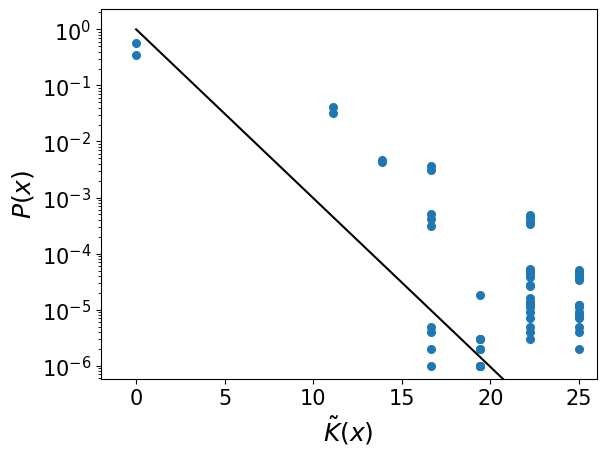

In [ ]:
for d in data:
    df = pd.read_csv(f"{d}_patterns.csv")

    patterns = list(df["pattern"])
    probability = Counter(patterns)
    probability = {k: v/SAMPLES for k,v in probability.items()}
    probability_values =  list(probability.values())
    # method = calc_KC76
    complexities = list(map(calc_KC76,probability.keys()))
    K = np.array(complexities)
    K_scaled = n_iterations * ( K-min(K) ) / ( max(K)-min(K) )

    K_scaled = np.round(K_scaled,2)
    plt.clf()
    # plt.gca().set_aspect('equal')
    plt.semilogy(K_scaled,probability_values,'o',ms=5, markeredgewidth=1.5)
    plt.xlabel(r'$\tilde{K}(x)$',fontsize=18)
    plt.ylabel(r'$P(x)$',fontsize=18)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    x = np.arange(0,n_iterations,1)
    # y = np.log10([max(probability_values),min(probability_values)])
    k = 1/(2**(x))
    # offset = abs(min(log_probabilities)-min(k))
    # if (k[1] > y[1]):
    #     offset = - offset
    # y_k = k + offset

    # plt.plot(x,y,c="k",label='fit')
    plt.plot(x,k,c='k',label=r"$2^{-k}$")
    plt.ylim([min(probability_values)/1.7,0])
    plt.xlim([-2,n_iterations+1])
    # plt.plot(x,y_k-offset,c='green',label=r"$2^{-k}$")
    # plt.legend(loc="upper right")
    # plt.title(f"start={start_iteration}, eps={epsilon}, e_freq={e_frequency}, r={'random' if r == -1 else r}, KC_method={method}")
    # plt.xlabel(r'$\mathit{\tilde{K}_{%s}(x)}$' % method,fontsize=15)
    # plt.ylim([0.5*1/SAMPLES,1])
    plt.savefig(f"SB/{d}",bbox_inches = "tight")